In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
#hide
import covid_alberta

# Covid Alberta

> This is a small package that I have developed to look at some of the alberta specific covid data.
> There are two parts to the package. the webscraper and the data analysis

This file will become your README and also the index of your documentation.

## Install

`pip install covid_alberta`

## Web Scraper

The `albertaC19` is a class that scrapes the updated stats off of the [alberta Covid-19 website](https://covid19stats.alberta.ca/).

example of using the webscraper


In [ ]:
abC19scaper = covid_alberta.albertaC19(outputfolder="")
# I don't plan on writing out the data in this example thus the keywords
ab_totals, ab_regions, ab_testing = abC19scaper.scrape_all(fltypes=None, return_dataframes=True)

Now we can show the dataframes

In [ ]:
ab_totals.tail()

,cum_cases,Confirmed_count,Probable_count,Daily_count,Active_cum,Died_cum,Recovered_cum
2020-04-04,1250,38,19,57,618,23,322
2020-04-05,1308,35,23,58,676,24,382
2020-04-06,1344,20,16,36,712,27,449
2020-04-07,1409,39,26,65,776,27,518
2020-04-08,1423,9,5,14,876,29,518


In [ ]:
ab_regions.tail()

,Calgary_cumulative,Central_cumulative,Edmont_cumulative,North_cumulative,South_cumulative,Unknown_cumulative
2020-04-04,778,61,315,75,19,2
2020-04-05,801,65,340,79,21,2
2020-04-06,821,65,348,86,22,2
2020-04-07,854,72,364,94,23,2
2020-04-08,860,72,368,95,26,2


In [ ]:
ab_testing.tail()

,test_count
2020-04-04,1737
2020-04-05,1112
2020-04-06,1129
2020-04-07,1319
2020-04-08,459


These are all pandas DataFrames. For more info on using pandas check out the pandas [cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html).

## analysis

> these are functions that I have started working on for some quick analyses of the data. The main one being doubling rates

### Doubling times

the `calculate_doublingtimes` function returns 2 columns.

> `dtime` is how many days our count has been doubling from the first reported case to get to todays case count

> `dtime_rw` is a rolling window calcualtion. So if you window is 6 days it looks at what our doubling rate, starting from the case count 6 days ago, would have to be to get to todays case count.

I started off looking at the rolling window calculation. However the more I look into it the more I'm not happy with using the rolling window. Our information about Covid-19 cases are changing so rapidly, that the rolling window calculation tends to be too noisy and too optimistic to be useful. We can calculate both below and see what they look like

In [ ]:
totals_dt = covid_alberta.calculate_doublingtimes(ab_totals, col_suffix="cum_cases", combine_df=False)
regions_dt = covid_alberta.calculate_doublingtimes(ab_regions, col_suffix="cumulative", combine_df=False)
totals_dt.tail()

,dtime,dtime_rw
2020-04-04,2.818897,7.119992
2020-04-05,2.897670,7.353586
2020-04-06,2.982973,9.613334
2020-04-07,3.059140,11.617191
2020-04-08,3.150442,17.176893


In [ ]:
regions_dt.tail()

,Calgary_dtime,Calgary_dtime_rw,Central_dtime,Central_dtime_rw,Edmont_dtime,Edmont_dtime_rw,North_dtime,North_dtime_rw,South_dtime,South_dtime_rw,Unknown_dtime,Unknown_dtime_rw
2020-04-04,3.019693,7.296903,4.046714,14.735665,3.872364,5.864623,3.692514,8.141493,4.472769,7.609425,0,0
2020-04-05,3.110208,7.587349,4.151191,12.826571,3.956375,6.261873,3.807239,8.008629,4.553405,6.431655,0,0
2020-04-06,3.202070,9.970858,4.317239,18.637702,4.082834,8.636192,3.890285,7.959255,4.709120,6.000000,0,0
2020-04-07,3.286065,12.181763,4.376066,15.441420,4.189037,11.309771,3.966687,8.029614,4.863424,7.289318,0,0
2020-04-08,3.385243,19.656061,4.538143,20.885405,4.323639,15.835158,4.109679,9.387934,4.893159,8.566048,0,0


## Plots

Here is some of the plots I've used for looking at the data. For this example I'm using matplotlib. Plotly creates nice plots but is a little harder to include in this documentation since it's hosted on github pages. If you head over to [my website](www.tyleracorn.com) I'll post the plotly code and example of the interactive plots there.

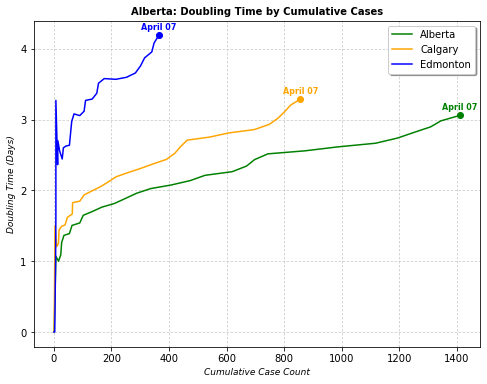

In [ ]:
import matplotlib.pyplot as plt

# Set defaults and settings
days_to_trim = 1
date_fmt = "%B %d"

# Grab the data we want for the plots and trim the last day off
plt_totals = ab_totals[:-days_to_trim]
plt_total_dt = totals_dt[:-days_to_trim]
plt_regions = ab_regions[:-days_to_trim]
plt_regions_dt = regions_dt[:-days_to_trim]

# use a format dictionary so I only have to set them in one location

fmt = {'alb': {'x_data': plt_totals['cum_cases'],
               'y_data': plt_total_dt['dtime'],
               'last_date': plt_totals.index.strftime(date_fmt)[-1],
               'annot_x': plt_totals['cum_cases'][-1],
               'annot_y': plt_total_dt['dtime'][-1],
               'color': 'green',
               'label': 'Alberta'},
       'cal': {'x_data': plt_regions['Calgary_cumulative'],
               'y_data': plt_regions_dt['Calgary_dtime'],
               'last_date': plt_regions.index.strftime(date_fmt)[-1],
               'annot_x': plt_regions['Calgary_cumulative'][-1],
               'annot_y': plt_regions_dt['Calgary_dtime'][-1],
               'color': 'orange',
               'label': 'Calgary'},
       'edm': {'x_data': plt_regions['Edmont_cumulative'],
               'y_data': plt_regions_dt['Edmont_dtime'],
               'last_date': plt_regions.index.strftime(date_fmt)[-1],
               'annot_x': plt_regions['Edmont_cumulative'][-1],
               'annot_y': plt_regions_dt['Edmont_dtime'][-1],
               'color': 'blue', 
               'label': 'Edmonton'},
      }

# Setup the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create the scatter plots using a loop and the dictionary above
for rgn in ['alb', 'cal', 'edm']:
    ax.plot(fmt[rgn]['x_data'], fmt[rgn]['y_data'], 
            c=fmt[rgn]['color'], label=fmt[rgn]['label'])

# add an annotation to the last point
for rgn in ['alb', 'cal', 'edm']:
    ax.plot(fmt[rgn]['annot_x'], fmt[rgn]['annot_y'], 'o', c=fmt[rgn]['color'])
    ax.text(fmt[rgn]['annot_x'] - 60, fmt[rgn]['annot_y'] + 0.08, fmt[rgn]['last_date'], 
            fontdict={'color': fmt[rgn]['color'], 'size': 8, 'weight': 'bold'})
# fancy up the plot
ax.grid(which='both', linestyle=(0, (5, 3)), lw=0.5)
ax.legend(frameon=True, fancybox=True, shadow=True)
ax.set_ylabel('Doubling Time (Days)', fontdict={'size': 9, 'family': 'sans-serif', 'style':'italic'})
ax.set_xlabel('Cumulative Case Count', fontdict={'size': 9, 'family': 'sans-serif', 'style':'italic'})
title = ax.set_title("Alberta: Doubling Time by Cumulative Cases",
                     fontdict={'fontsize': 10, 'family': 'sans-serif', 'fontweight': 'bold'})

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_webscraper.ipynb.
Converted 01_analysis.ipynb.
Converted index.ipynb.
